In [2]:
import pandas as pd
import networkx as nx

data = pd.read_parquet("all_and_synthetic_conns.parquet").drop(
    columns="Preferential Attachment"
)
data.head(3)

,Node1,Node2,Edge Weight,Jaccard Coefficient,Adamic-Adar Index,Common Neighbors,new Edge Weight,final Edge Weight
0,"Хакасия, Абаза","Хакасия, Абакан",NaN,0.115385,1.128776,3,20.0,20.0
1,"Хакасия, Абаза","Оренбургская область, Абдулино",NaN,0.058824,0.189462,1,18.0,18.0
2,"Хакасия, Абаза","Краснодарский край, Абинск",NaN,0.066667,0.189462,1,10.0,10.0


In [3]:
data.sample(3)

,Node1,Node2,Edge Weight,Jaccard Coefficient,Adamic-Adar Index,Common Neighbors,new Edge Weight,final Edge Weight
133873,"Воронежская область, Бутурлиновка","Мурманская область, Полярные Зори",NaN,0.000000,0.000000,0,0.0,0.0
154496,"Якутия, Вилюйск","Вологодская область, Харовск",NaN,0.035714,0.214003,1,20.0,20.0
195264,"Алтай, Горно-Алтайск","Ивановская область, Родники",NaN,0.111111,0.621335,1,19.0,19.0


In [4]:
cities = pd.read_parquet(
    "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/cities.parquet"
)
cities["population"] /= 1e6
cities.head(2)

,region_city,city_category,population,harsh_climate,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,...,probability_to_move,probability_to_move_to_SELECTED_CITY,migrations_to_selected_city,num_in_migration,one_vacancy_out_response,estimate,h3_index,x,y,geometry
0,"Хакасия, Абаза",Малый город,0.012055,False,172,36,34,27,16,20,...,0.889793,0.002423,0.029192,0.390940,74.180,0.512,862535cc7ffffff,90.097573,52.647106,b'\x01\x01\x00\x00\x00?\xfe\xd2\xa2>\x86V@\xcf...
1,"Хакасия, Абакан",Большой город,0.185348,False,210,36,37,24,37,36,...,0.413735,0.020500,0.774521,17.594633,18.926,0.687,8625263b7ffffff,91.450000,53.740000,b'\x01\x01\x00\x00\x00\xcd\xcc\xcc\xcc\xcc\xdc...


In [5]:
from sklearn.preprocessing import MinMaxScaler

cols = [
    "population",
    "harsh_climate",
    "ueqi_residential",
    "ueqi_street_networks",
    "ueqi_green_spaces",
    "ueqi_public_and_business_infrastructure",
    "ueqi_social_and_leisure_infrastructure",
    "ueqi_citywide_space",
    "median_salary",
    "factories_total",
]

In [6]:
from sklearn.preprocessing import MinMaxScaler


city_sc = MinMaxScaler()

cities.loc[:, cols] = pd.DataFrame(city_sc.fit_transform(cities[cols]), columns=cols)

g2 = nx.from_pandas_edgelist(
    data,
    source="Node1",
    target="Node2",
    edge_attr=[
        "Jaccard Coefficient",
        "Adamic-Adar Index",
        "Common Neighbors",
        "final Edge Weight",
    ],
)

for _, row in cities.iterrows():
    city_name = row["region_city"]

    for k, v in row.to_dict().items():
        if k in cols:
            g2.nodes[city_name][k] = v

/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_1611/575284884.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  cities.loc[:, cols] = pd.DataFrame(city_sc.fit_transform(cities[cols]), columns=cols)
/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_1611/575284884.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.56818182 0.56818182 0.52272727 ... 0.25       0.15909091 0.5       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cities.loc[:, cols] = pd.DataFrame(city_sc.fit_transform(cities[cols]), columns=cols)
/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_1611/575284884.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will r

In [7]:
print(list(g2.nodes(data=True))[0])
print(list(g2.edges(data=True))[0])

('Хакасия, Абаза', {'population': 0.0008613788976593802, 'harsh_climate': 0.0, 'ueqi_residential': 0.5681818181818182, 'ueqi_street_networks': 0.4722222222222222, 'ueqi_green_spaces': 0.40909090909090906, 'ueqi_public_and_business_infrastructure': 0.2, 'ueqi_social_and_leisure_infrastructure': 0.27906976744186046, 'ueqi_citywide_space': 0.5405405405405406, 'median_salary': 0.17823359754744758, 'factories_total': 0.0})
('Хакасия, Абаза', 'Хакасия, Абакан', {'Jaccard Coefficient': 0.11538461538461539, 'Adamic-Adar Index': 1.1287764428208267, 'Common Neighbors': 3, 'final Edge Weight': 20.0})


In [8]:
import itertools


# Function to compute similarity based on node attributes
def compute_similarity(G):
    similarity_scores = {}
    for u, v in itertools.combinations(G.nodes(), 2):
        if u == v:
            continue

        # Compute feature differences or similarities (using a simple difference metric here)
        pop_diff = abs(G.nodes[u]["population"] - G.nodes[v]["population"])
        salary_diff = abs(G.nodes[u]["median_salary"] - G.nodes[v]["median_salary"])
        ueqi_diff = (
            abs(G.nodes[u]["ueqi_residential"] - G.nodes[v]["ueqi_residential"])
            + abs(
                G.nodes[u]["ueqi_street_networks"] - G.nodes[v]["ueqi_street_networks"]
            )
            + abs(G.nodes[u]["ueqi_green_spaces"] - G.nodes[v]["ueqi_green_spaces"])
            + abs(
                G.nodes[u]["ueqi_public_and_business_infrastructure"]
                - G.nodes[v]["ueqi_public_and_business_infrastructure"]
            )
            + abs(
                G.nodes[u]["ueqi_social_and_leisure_infrastructure"]
                - G.nodes[v]["ueqi_social_and_leisure_infrastructure"]
            )
            + abs(G.nodes[u]["ueqi_citywide_space"] - G.nodes[v]["ueqi_citywide_space"])
        )

        # A simple similarity metric: lower difference means higher similarity
        similarity = G[u][v]["final Edge Weight"] / (
            1 + pop_diff + salary_diff + ueqi_diff
        )
        similarity_scores[(u, v)] = similarity
    return similarity_scores


# Function to predict new links
def predict_links(G, threshold=0.1):
    similarity_scores = compute_similarity(G)

    predictions = []
    for (city1, city2), score in similarity_scores.items():
        # Only predict a link if it doesn't already exist and meets the threshold
        if score > threshold:
            predictions.append((city1, city2, score))

    return predictions

In [9]:
# Predict links again after modifying attributes
predicted_sim = predict_links(g2, 0.1)

In [10]:
e_lst = nx.to_pandas_edgelist(g2)
e_lst

,source,target,Adamic-Adar Index,final Edge Weight,Jaccard Coefficient,Common Neighbors
0,"Хакасия, Абаза","Хакасия, Абакан",1.128776,20.0,0.115385,3
1,"Хакасия, Абаза","Оренбургская область, Абдулино",0.189462,18.0,0.058824,1
2,"Хакасия, Абаза","Краснодарский край, Абинск",0.189462,10.0,0.066667,1
3,"Хакасия, Абаза","Башкортостан, Агидель",0.000000,0.0,0.000000,0
4,"Хакасия, Абаза","Татарстан, Агрыз",0.000000,0.0,0.000000,0
...,...,...,...,...,...,...
611060,"Челябинская область, Нязепетровск","Псковская область, Новоржев",0.000000,0.0,0.000000,0
611061,"Челябинская область, Нязепетровск","Нижегородская область, Ворсма",0.000000,0.0,0.000000,0
611062,"Тульская область, Чекалин","Псковская область, Новоржев",0.000000,0.0,0.000000,0
611063,"Тульская область, Чекалин","Нижегородская область, Ворсма",0.000000,0.0,0.000000,0


In [11]:
data = e_lst.merge(
    pd.DataFrame(predicted_sim, columns=["source", "target", "sim"]),
    on=["source", "target"],
    how="inner",
)

In [12]:
data.head()

,source,target,Adamic-Adar Index,final Edge Weight,Jaccard Coefficient,Common Neighbors,sim
0,"Хакасия, Абаза","Хакасия, Абакан",1.128776,20.0,0.115385,3,9.750389
1,"Хакасия, Абаза","Оренбургская область, Абдулино",0.189462,18.0,0.058824,1,8.446630
2,"Хакасия, Абаза","Краснодарский край, Абинск",0.189462,10.0,0.066667,1,6.036428
3,"Хакасия, Абаза","Татарстан, Азнакаево",0.189462,21.0,0.045455,1,10.715756
4,"Хакасия, Абаза","Ростовская область, Азов",0.185561,21.0,0.041667,1,9.156998


In [13]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

model = CatBoostRegressor(
    loss_function="MAPE",  # или 'Tweedie' с параметром variance_power
    eval_metric="MAPE",
    iterations=500,
    learning_rate=0.05,
    depth=12,
    random_seed=42,
    early_stopping_rounds=5,
)

X = data[["sim"]]
y = data[["final Edge Weight"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model.fit(
    X_train,
    y_train,
    # sample_weight=sample_weights,
    eval_set=(
        pd.DataFrame(X).sample(2000, random_state=42),
        y.sample(2000, random_state=42),
    ),
    early_stopping_rounds=5,
    verbose=50,
)

0:	learn: 0.2637783	test: 0.2767260	best: 0.2767260 (0)	total: 77.8ms	remaining: 38.8s
50:	learn: 0.0959890	test: 0.0977166	best: 0.0977166 (50)	total: 753ms	remaining: 6.63s
100:	learn: 0.0791169	test: 0.0795814	best: 0.0795814 (100)	total: 1.41s	remaining: 5.56s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.07800534313
bestIteration = 135

Shrink model to first 136 iterations.


In [14]:
print(mean_absolute_percentage_error(y_train, model.predict(X_train)))
print(mean_absolute_percentage_error(y_test, model.predict(X_test)))

0.07765052633440407
0.07638678454188688


In [15]:
pred = model.predict(X_test)
pred

array([21.41900811, 19.99906586, 19.99907056, ..., 19.99906586,
       21.11752266, 19.99906676])

(array([ 8357.,   329.,   298.,   497., 27378.,  2883.,  1411.]),
 array([ 9.9643136 , 12.17701078, 14.38970796, 16.60240514, 18.81510232,
        21.0277995 , 23.24049668, 25.45319385]),
 <BarContainer object of 7 artists>)

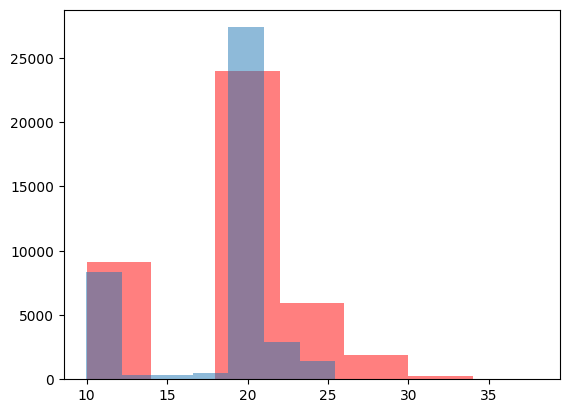

In [16]:
import matplotlib.pyplot as plt

plt.hist(y_test, bins=7, alpha=0.5, color="r")
plt.hist(pred, bins=7, alpha=0.5)

In [17]:
node1 = "Адыгея, Адыгейск"

mask = data["source"] == node1

data[mask]["final Edge Weight"].sum()

2444.0

<Axes: >

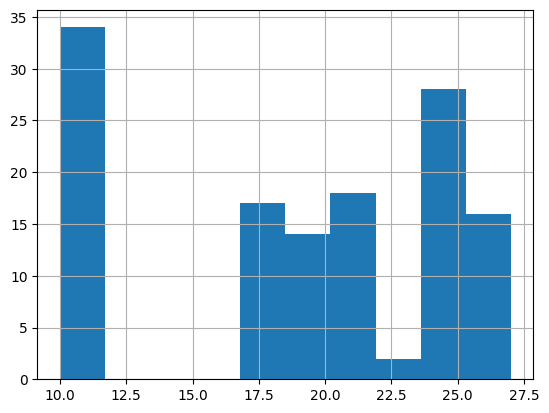

In [18]:
data[mask]["final Edge Weight"].hist()

In [26]:
# Modify attributes of a node (e.g., increase the population of Хакасия, Абаза)
new_params = {
    "ueqi_residential": 0,
    "ueqi_street_networks": 0,
    "ueqi_green_spaces": 0,
    "ueqi_public_and_business_infrastructure": 0,
    "ueqi_social_and_leisure_infrastructure": 0,
    "ueqi_citywide_space": 0,
    "median_salary": 0
}


# Predict links again after modifying attributes
# predicted_sim_2 = predict_links(g2, 0.1)
# print("\nPredicted links after modifying attributes:")
# for city1, city2, score in predicted_sim_2:
#     if city1 == node1:
#         print(f"Link between {city1} and {city2} with similarity score: {score:.4f}")

for k, v in new_params.items():
    g2.nodes[node1][k] = v
    g2.nodes[node1][k] = v


predicted_sim_updated = predict_links(g2, 0.1)

In [27]:
data_2 = e_lst.merge(
    pd.DataFrame(predicted_sim_updated, columns=["source", "target", "sim"]),
    on=["source", "target"],
    how="inner",
)

In [28]:
data_2["new_target"] = model.predict(data_2["sim"])

In [29]:
node1 = "Адыгея, Адыгейск"

mask = data_2["source"] == node1

data_2[mask]["new_target"].sum()

2579.879496409753

In [30]:
data_2[mask]["new_target"]

1842    19.999066
1843    19.999066
1844    19.999066
1845    19.999066
1846    19.999066
          ...    
1966    19.999066
1967    19.999066
1968    19.999066
1969    19.999066
1970    19.999066
Name: new_target, Length: 129, dtype: float64

<Axes: >

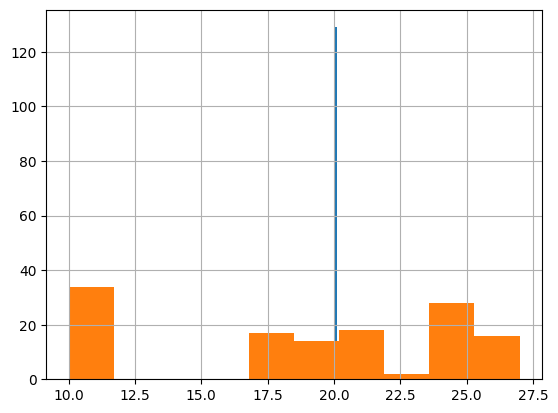

In [25]:
data_2[mask]["new_target"].hist()
data[mask]["final Edge Weight"].hist()